In [51]:
%load_ext autoreload
%autoreload 2
import numpy as np
import h5py
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### viz the metadata

In [2]:
file_path = "../../datasets/imagenet_v5_rot_10k_fix_vector_a100_0-hierarchy_one_hot_encoding.h5"

with h5py.File(file_path, "r") as f:
    loaded_dict = json.loads(f.attrs["symmetry_dict"])
    print("Loaded dictionary:", loaded_dict)
    
    loaded_dict = json.loads(f.attrs["shape_dict"])
    print("Loaded dictionary:", loaded_dict)
    
    print("Datasets in the file:")
    for name in f.keys():
        print(f"  {name} -> shape: {f[name].shape}, dtype: {f[name].dtype}")
        print("    description:", f[name].attrs.get('description', 'No description'))
    
    print("\nFile description:")
    print(f.attrs.get('description', 'No description'))

Loaded dictionary: {'p1': 0, 'p2': 1, 'pm': 2, 'pg': 3, 'cm': 4, 'pmm': 5, 'pmg': 6, 'pgg': 7, 'cmm': 8, 'p4': 9, 'p4m': 10, 'p4g': 11, 'p3': 12, 'p3m1': 13, 'p31m': 14, 'p6': 15, 'p6m': 16}
Loaded dictionary: {'rectangular': 0, 'square': 0, 'oblique': 1, 'hexagonal': 1, 'rhombic': 2, 'triangle': 3}
Datasets in the file:
  labels -> shape: (10013,), dtype: uint8
    description: Original wallpaper group labels (uint8).
  labels_one_hot -> shape: (10013, 17), dtype: float64
    description: One-hot encoded labels for 17 wallpaper groups.
  normalized_primitive_uc_vector_a -> shape: (10013, 2), dtype: float64
    description: No description
  normalized_primitive_uc_vector_b -> shape: (10013, 2), dtype: float64
    description: No description
  normalized_rotation_angle -> shape: (10013,), dtype: float32
    description: No description
  normalized_translation_start_point -> shape: (10013, 2), dtype: float64
    description: No description
  reflection_labels -> shape: (10013,), dtype: u

In [3]:
with h5py.File(file_path, "r") as f:
    idx = 0  # choose a record
    label = f["labels"][idx]
    rotation = f["rotation_labels"][idx]
    sub_rotation = f["sub_rotation_labels"][idx]
    reflection = f["reflection_labels"][idx]

    print(f"Sample {idx}:")
    print(f"  Wallpaper Group Label: {label}")
    print(f"  Rotation Class: {rotation} (0=No rotation, 1=2-fold, 2=3-fold)")
    print(f"  Sub-Rotation: {sub_rotation} (0/1 depending on 4/6-fold)")
    print(f"  Reflection: {reflection} (0=No reflection, 1=With reflection)")

Sample 0:
  Wallpaper Group Label: 8
  Rotation Class: 1 (0=No rotation, 1=2-fold, 2=3-fold)
  Sub-Rotation: 0 (0/1 depending on 4/6-fold)
  Reflection: 1 (0=No reflection, 1=With reflection)


In [4]:
import pandas as pd

with h5py.File(file_path, "r") as f:
    n = 20  # first 20 records
    df = pd.DataFrame({
        "Label": f["labels"][:n],
        "Rotation": f["rotation_labels"][:n],
        "SubRotation": f["sub_rotation_labels"][:n],
        "Reflection": f["reflection_labels"][:n]
    })
print(df)


    Label  Rotation  SubRotation  Reflection
0       8         1            0           1
1       9         1            1           0
2       6         1            0           0
3      12         2            0           0
4       7         1            0           1
5      13         2            0           1
6       3         0            0           0
7      16         2            1           1
8       4         0            0           1
9      14         2            0           1
10      4         0            0           1
11     14         2            0           1
12     13         2            0           1
13      1         1            0           0
14      4         0            0           1
15      5         1            0           1
16      5         1            0           1
17      2         0            0           1
18      3         0            0           0
19     10         1            1           1


### manual exam the examples

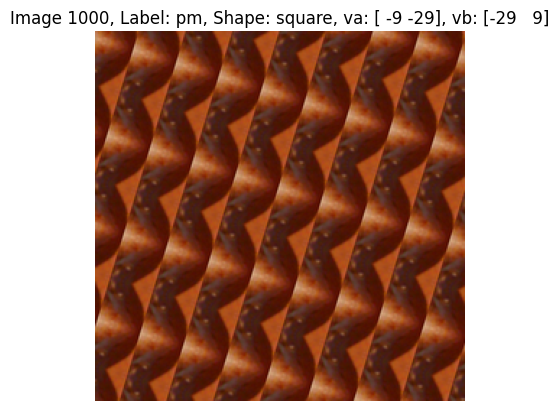

In [ ]:
import h5py
import numpy as np
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from dl_utils.utils.viz import show_images

symmetry_dict = {'p1': 0, 'p2': 1, 'pm': 2, 'pg': 3, 'cm': 4, 'pmm': 5, 'pmg': 6, 'pgg': 7, 'cmm': 8, 'p4': 9, 'p4m': 10, 'p4g': 11, 'p3': 12, 'p3m1': 13, 'p31m': 14, 'p6': 15, 'p6m': 16}
shape_dict = { 'rectangular': 0, 'square': 0, 'oblique': 1, 'hexagonal': 1, 'rhombic': 2, 'triangle': 3 }
symmetry_dict_inv = {v: k for k, v in symmetry_dict.items()}
shape_dict_inv = {v: k for k, v in shape_dict.items()}

# --- Parameters ---
target_index = 1000  # the image index you want to find neighbors for
top_k = 550       # number of nearest matches to return

    
# load image from the dataset
with h5py.File("../../datasets/imagenet_v5_rot_10k_fix_vector_a100_0.h5", 'r') as f:
    # viz_h5_structure(f)
    img_target = np.array(f['imagenet']['data'][target_index])  # shape: [H, W, C]
    label = f['imagenet']['labels'][target_index]  # label of the image
    label_str = symmetry_dict_inv[label]  # convert label to string
    shape = f['imagenet']['shape'][target_index]  # shape of the image
    shape_str = shape_dict_inv[shape]  # convert shape to string
    va, vb = f['imagenet']['primitive_uc_vector_a'][target_index], f['imagenet']['primitive_uc_vector_b'][target_index]  # va and vb vectors
        
plt.imshow(img_target)
plt.axis('off')
plt.title(f"Image {target_index}, Label: {label_str}, Shape: {shape_str}, va: {va}, vb: {vb}")
plt.show()

In [ ]:
# Load the data
with h5py.File("../../datasets/imagenet_v5_rot_10k_fix_vector_a100_0-hierarchy_one_hot_encoding.h5", 'r') as f:
    labels_one_hot = f['labels_one_hot'][:]           # [N, 17]
    shapes_one_hot = f['shape_one_hot'][:]           # [N, S]
    similarity_vector = f['similarity_vector'][:]     # [N, 7]


# Combine all into one feature vector
combined_features = np.hstack([
    labels_one_hot,
    shapes_one_hot,
    similarity_vector
])  # Shape: (N, D)

# --- Pick your target ---
target_index = 0
top_k = 10000

target = combined_features[target_index].reshape(1, -1)

# Exclude self
mask = np.arange(combined_features.shape[0]) != target_index
candidates = combined_features[mask]
candidate_indices = np.where(mask)[0]

# Compute distance
distances = cdist(target, candidates, metric="euclidean")[0]

# Get top K
top_k_idx = np.argsort(distances)[:top_k]
top_k_global_idx = candidate_indices[top_k_idx]
top_k_dist = distances[top_k_idx]

# Show results
print(f"Top {top_k} similar images to index {target_index}:")
for rank, (idx, d) in enumerate(zip(top_k_global_idx, top_k_dist), 1):
    print(f"{rank}. Index {idx}, Distance = {d:.4f}")

Top 10000 similar images to index 0:
1. Index 6885, Distance = 0.0591
2. Index 4672, Distance = 0.1032
3. Index 3444, Distance = 0.1055
4. Index 6485, Distance = 0.1185
5. Index 903, Distance = 0.1243
6. Index 3601, Distance = 0.1292
7. Index 2951, Distance = 0.1315
8. Index 8535, Distance = 0.1422
9. Index 3505, Distance = 0.1424
10. Index 5944, Distance = 0.1501
11. Index 6088, Distance = 0.1545
12. Index 3896, Distance = 0.1575
13. Index 5073, Distance = 0.1649
14. Index 2203, Distance = 0.1665
15. Index 1135, Distance = 0.1706
16. Index 2866, Distance = 0.1837
17. Index 8073, Distance = 0.1877
18. Index 2162, Distance = 0.1881
19. Index 891, Distance = 0.1886
20. Index 2857, Distance = 0.1891
21. Index 9248, Distance = 0.1913
22. Index 8436, Distance = 0.1939
23. Index 4443, Distance = 0.1995
24. Index 6617, Distance = 0.2064
25. Index 7947, Distance = 0.2068
26. Index 9851, Distance = 0.2168
27. Index 679, Distance = 0.2197
28. Index 2366, Distance = 0.2265
29. Index 227, Distance

In [85]:
# load image from the dataset
images_top10, titles_top10 = [], []
with h5py.File("../../datasets/imagenet_v5_rot_10k_fix_vector_a100_0.h5", 'r') as f:
    
    for ind in top_k_global_idx[:10]:  # only take the first 10 for visualization
        image = np.array(f['imagenet']['data'][ind])  # shape: [H, W, C]
        label = f['imagenet']['labels'][ind]  # label of the image
        label_str = symmetry_dict_inv[label]  # convert label to string
        shape = f['imagenet']['shape'][ind]  # shape of the image
        shape_str = shape_dict_inv[shape]  # convert shape to string
        va, vb = f['imagenet']['primitive_uc_vector_a'][ind], f['imagenet']['primitive_uc_vector_b'][ind]
        images_top10.append(image)
        titles_top10.append(f"Index {ind}, Label: {label_str}, \nShape: {shape_str}, \nva: {va}, vb: {vb}")

images_top10 = np.array(images_top10)  # Convert list to numpy array for visualization
print(images_top10.shape)

images_last10, titles_last10 = [], []
with h5py.File("../../datasets/imagenet_v5_rot_10k_fix_vector_a100_0.h5", 'r') as f:
    
    for ind in top_k_global_idx[-10:]:  # Get the last 10 indices
        image = np.array(f['imagenet']['data'][ind])  # shape: [H, W, C]
        label = f['imagenet']['labels'][ind]  # label of the image
        label_str = symmetry_dict_inv[label]  # convert label to string
        shape = f['imagenet']['shape'][ind]  # shape of the image
        shape_str = shape_dict_inv[shape]  # convert shape to string
        va, vb = f['imagenet']['primitive_uc_vector_a'][ind], f['imagenet']['primitive_uc_vector_b'][ind]
        images_last10.append(image)
        titles_last10.append(f"Index {ind}, Label: {label_str}, \nShape: {shape_str}, \nva: {va}, vb: {vb}")

images_last10 = np.array(images_last10)  # Convert list to numpy array for visualization
print(images_last10.shape)

(10, 256, 256, 3)
(10, 256, 256, 3)


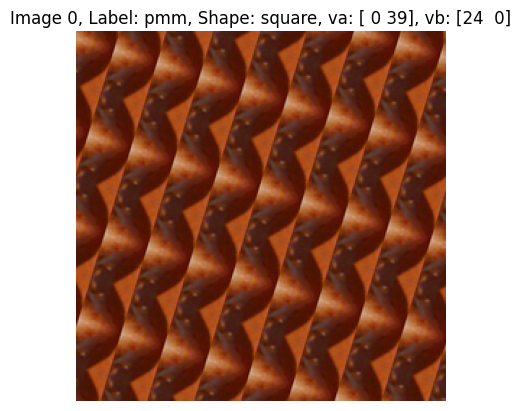

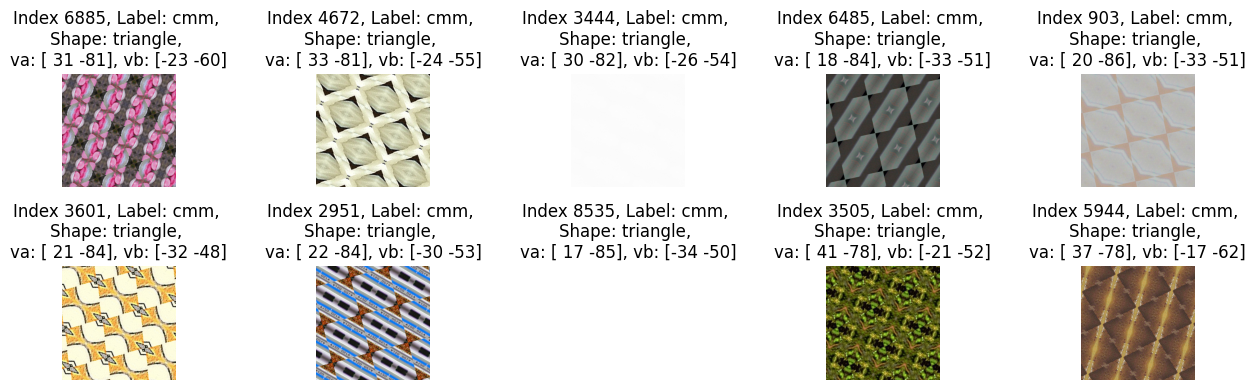

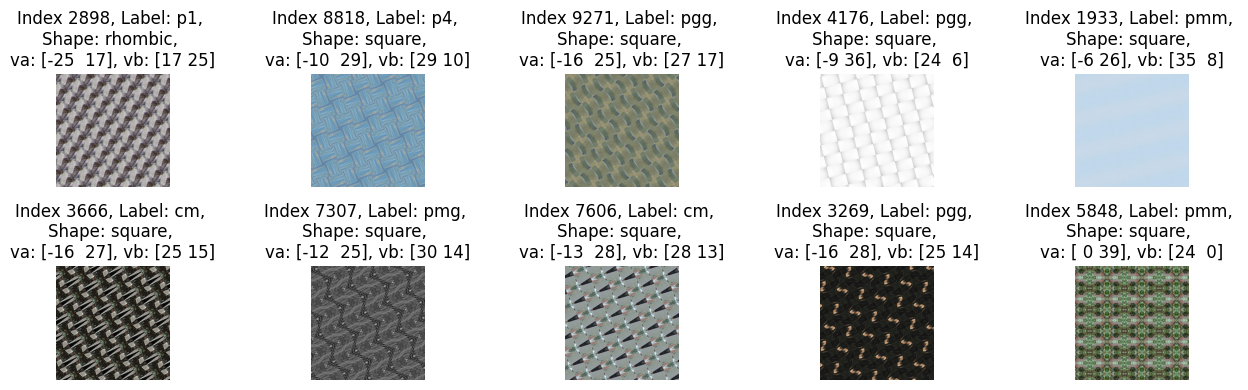

In [86]:
plt.imshow(img_target)
plt.axis('off')
plt.title(f"Image {target_index}, Label: {label_str}, Shape: {shape_str}, va: {va}, vb: {vb}")
plt.show()

show_images(images_top10, labels=titles_top10, img_per_row=5)
show_images(images_last10, labels=titles_last10, img_per_row=5)

### exam the class within same symmetry class

In [76]:

# --- Step 1: Find same-label candidates ---
target_label = labels_one_hot[target_index]
label_mask = np.all(labels_one_hot == target_label, axis=1)

# Exclude self-match
label_mask[target_index] = False

# --- Step 2: Subset candidates and compute distances ---
candidates = similarity_vectors[label_mask]           # [M, 7]
candidate_indices = np.where(label_mask)[0]

target_vector = similarity_vectors[target_index].reshape(1, -1)  # [1, 7]

# Compute Euclidean distance
distances = cdist(target_vector, candidates, metric='euclidean')[0]  # shape: [M]

# --- Step 3: Get top K closest ---
top_k_indices = np.argsort(distances)[:top_k]
top_k_global_indices = candidate_indices[top_k_indices]  # Indices in the original dataset
top_k_distances = distances[top_k_indices]

# --- Result ---
print(f"Closest {top_k} examples to index {target_index}:")
for rank, (idx, dist) in enumerate(zip(top_k_global_indices, top_k_distances), 1):
    print(f"{rank}. Index {idx}, Distance: {dist:.4f}")


Closest 550 examples to index 1000:
1. Index 5532, Distance: 0.0203
2. Index 1335, Distance: 0.0406
3. Index 528, Distance: 0.0442
4. Index 4305, Distance: 0.0518
5. Index 6298, Distance: 0.0524
6. Index 8493, Distance: 0.0559
7. Index 7545, Distance: 0.0596
8. Index 6199, Distance: 0.0603
9. Index 7619, Distance: 0.0639
10. Index 1825, Distance: 0.0641
11. Index 4597, Distance: 0.0641
12. Index 2791, Distance: 0.0655
13. Index 9535, Distance: 0.0661
14. Index 9963, Distance: 0.0683
15. Index 4512, Distance: 0.0716
16. Index 1051, Distance: 0.0728
17. Index 7773, Distance: 0.0777
18. Index 8086, Distance: 0.0801
19. Index 396, Distance: 0.0871
20. Index 603, Distance: 0.0882
21. Index 1491, Distance: 0.0948
22. Index 421, Distance: 0.0964
23. Index 8421, Distance: 0.0992
24. Index 6435, Distance: 0.0999
25. Index 2336, Distance: 0.1002
26. Index 4463, Distance: 0.1010
27. Index 4083, Distance: 0.1016
28. Index 8926, Distance: 0.1019
29. Index 9629, Distance: 0.1026
30. Index 6441, Dist

In [77]:
# load image from the dataset
images, titles = [], []
with h5py.File("../../datasets/imagenet_v5_rot_10k_fix_vector_a100_0.h5", 'r') as f:
    
    for ind in top_k_global_indices:
        image = np.array(f['imagenet']['data'][ind])  # shape: [H, W, C]
        label = f['imagenet']['labels'][ind]  # label of the image
        label_str = symmetry_dict_inv[label]  # convert label to string
        shape = f['imagenet']['shape'][ind]  # shape of the image
        shape_str = shape_dict_inv[shape]  # convert shape to string
        va, vb = f['imagenet']['primitive_uc_vector_a'][ind], f['imagenet']['primitive_uc_vector_b'][ind]
        images.append(image)
        titles.append(f"Index {ind}, Label: {label_str}, \nShape: {shape_str}, \nva: {va}, vb: {vb}")

images = np.array(images)  # Convert list to numpy array for visualization
print(images.shape)

(550, 256, 256, 3)


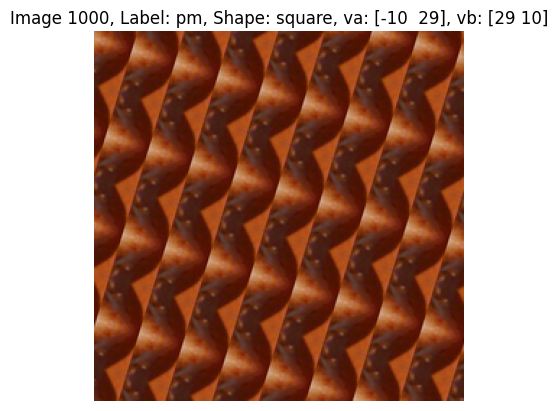

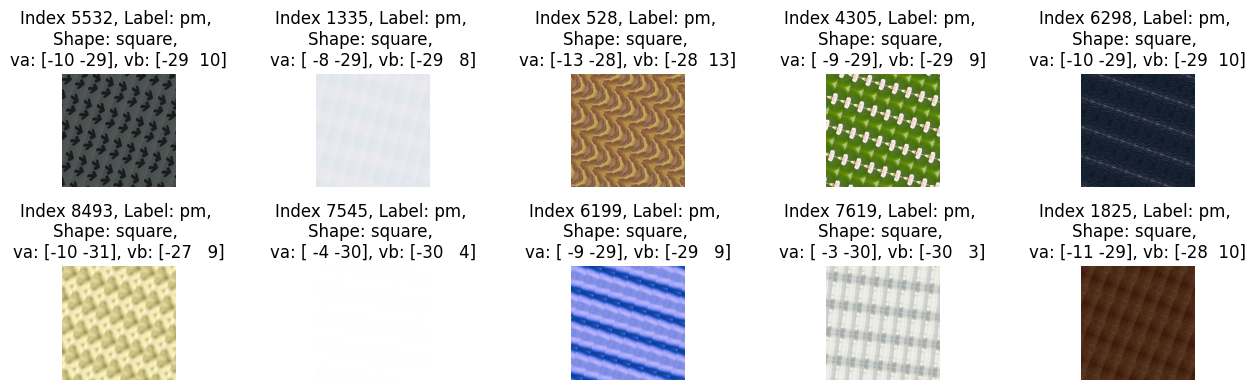

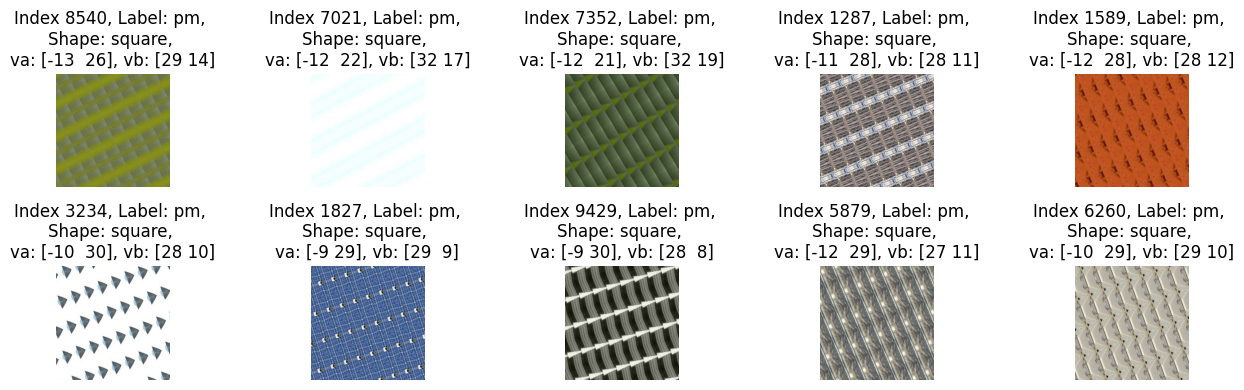

In [78]:

plt.imshow(img_target)
plt.axis('off')
plt.title(f"Image {target_index}, Label: {label_str}, Shape: {shape_str}, va: {va}, vb: {vb}")
plt.show()

show_images(images[:10], labels=titles[:10], img_per_row=5)
show_images(images[-10:], labels=titles[-10:], img_per_row=5)

(10, 256, 256, 3)


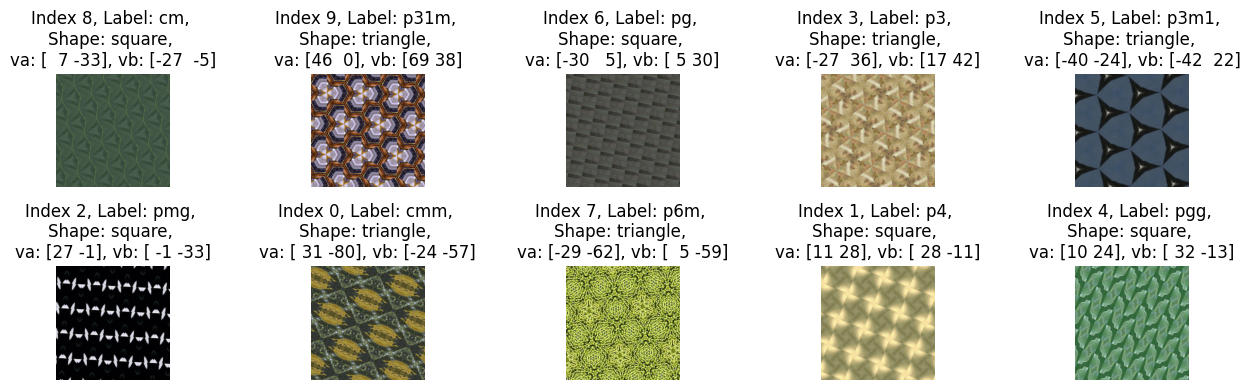

In [57]:
random_indices = np.random.choice(len(images), size=10, replace=False)

#load image from the dataset
images, titles = [], []
with h5py.File("../../datasets/imagenet_v5_rot_10k_fix_vector_a100_0.h5", 'r') as f:
    
    for ind in random_indices:
        image = np.array(f['imagenet']['data'][ind])  # shape: [H, W, C]
        label = f['imagenet']['labels'][ind]  # label of the image
        label_str = symmetry_dict_inv[label]  # convert label to string
        shape = f['imagenet']['shape'][ind]  # shape of the image
        shape_str = shape_dict_inv[shape]  # convert shape to string
        va, vb = f['imagenet']['primitive_uc_vector_a'][ind], f['imagenet']['primitive_uc_vector_b'][ind]
        images.append(image)
        titles.append(f"Index {ind}, Label: {label_str}, \nShape: {shape_str}, \nva: {va}, vb: {vb}")

images = np.array(images)  # Convert list to numpy array for visualization
print(images.shape)

# plt.imshow(image)
# plt.axis('off')
# plt.title(f"Image {target_index}, Label: {label_str}, Shape: {shape_str}")
# plt.show()

show_images(images, labels=titles, img_per_row=5)